KEY INSIGHTS – 2025

Best-selling product : Product A (918 units)
Best month           : Sep
Best quarter         : Q3


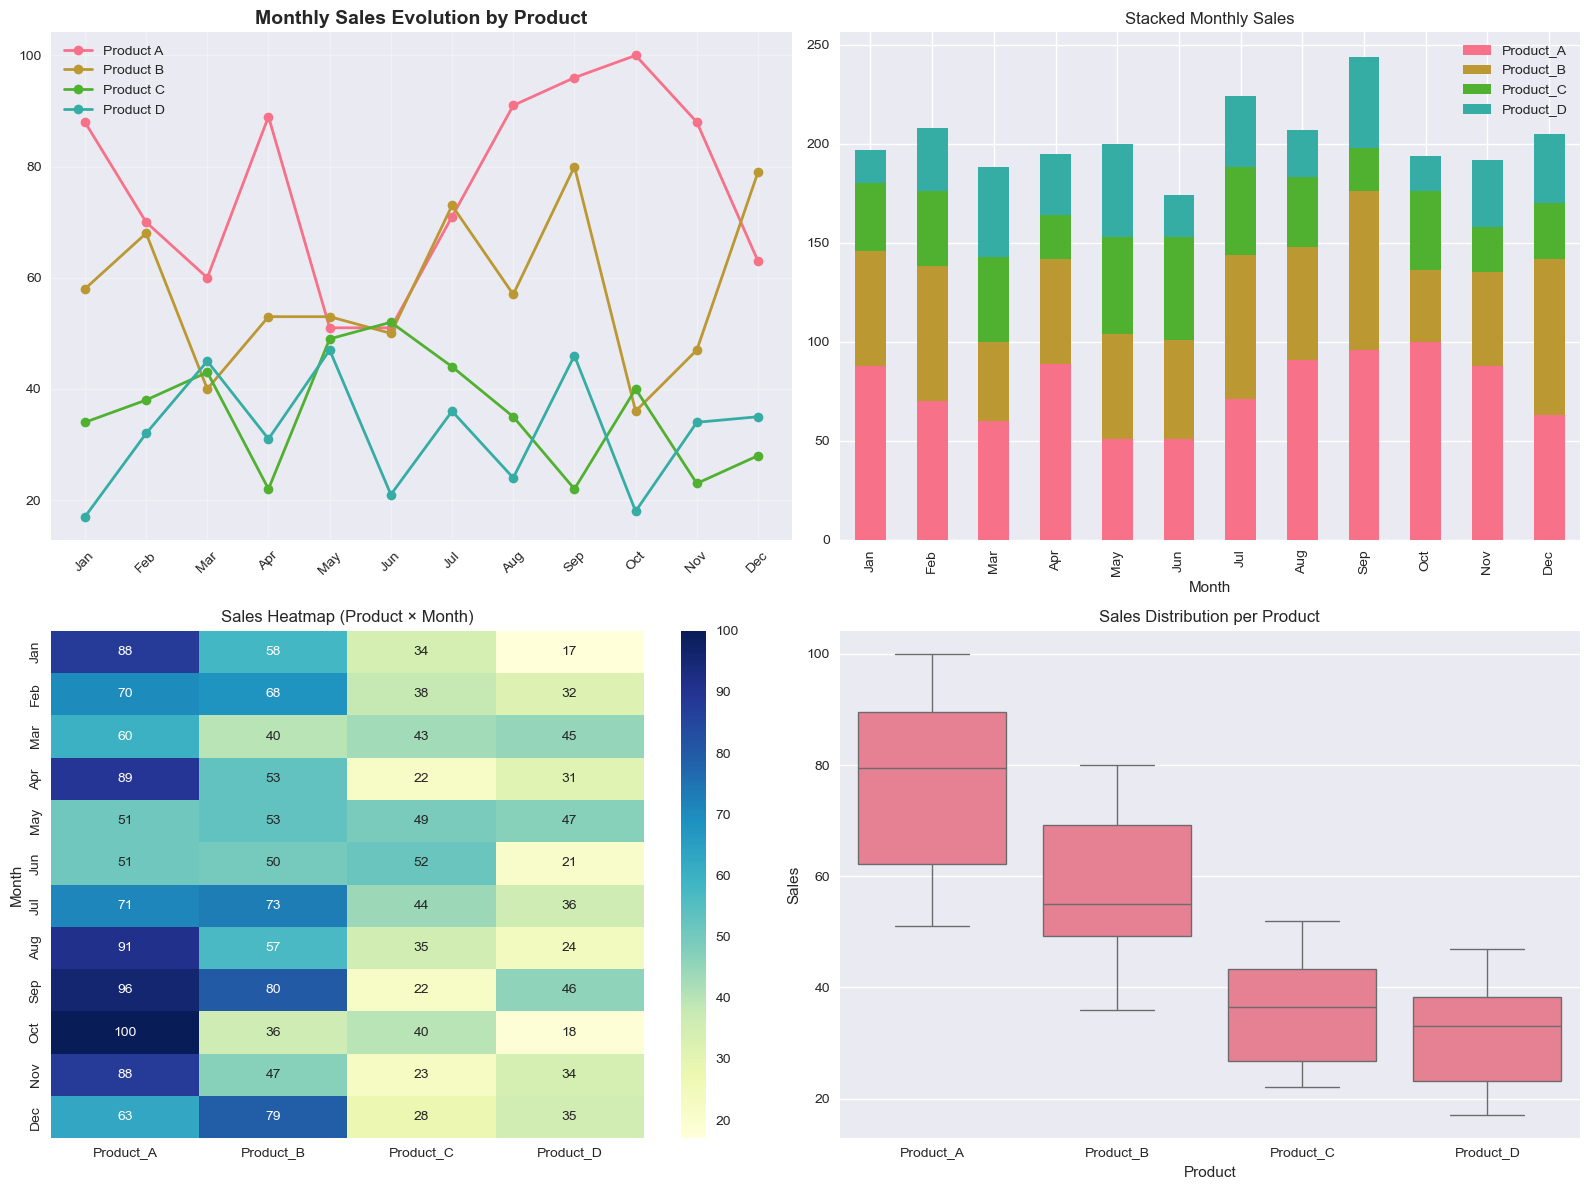


1. Which product contributes the most to overall sales?
 → Product A with 918 units.

2. Which quarter performs best?
 → Q3 with 675 units.

3. Recommendations for next year:
 • Increase marketing and stock for Product A
 • Prepare strong promotions ahead of Q3
 • Boost the weakest product via bundles
 • Use MoM trends to fine-tune monthly targets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from utils import generate_monthly_sales

os.makedirs("data", exist_ok=True)
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

try:
    df = pd.read_csv("data/initial.csv", parse_dates=["Date"])
except:
    df = generate_monthly_sales()
df.head()

df_final = df.copy()
products = ["Product_A", "Product_B", "Product_C", "Product_D"]

df_final["Total_Sales"]   = df_final[products].sum(axis=1)
df_final["Average_Sales"] = df_final[products].mean(axis=1)
df_final["MoM_Growth_%"]  = df_final["Total_Sales"].pct_change() * 100

df_final["Month"]   = df_final["Date"].dt.strftime("%b")
df_final["Quarter"] = df_final["Date"].dt.quarter.map({1:"Q1", 2:"Q2", 3:"Q3", 4:"Q4"})

df_final["Max_Sales_Product"] = df_final[products].idxmax(axis=1).str.replace("_", " ")
df_final["Min_Sales_Product"] = df_final[products].idxmin(axis=1).str.replace("_", " ")

df_final.to_csv("data/final.csv", index=False)
df_final.head()
pivot_avg = pd.pivot_table(
    df_final,
    values=products,
    index="Quarter",
    aggfunc="mean"
).round(2)

pivot_total = pd.pivot_table(
    df_final,
    values="Total_Sales",
    index="Quarter",
    aggfunc="sum"
)

output_df = pd.concat([pivot_avg, pivot_total], axis=1)
output_df.columns = list(pivot_avg.columns) + ["Total_Sales_Quarter"]
output_df.to_csv("data/output.csv")

pivot_avg, pivot_total


total_year = df_final[products].sum()
best_product = total_year.idxmax().replace("_", " ")
best_units = int(total_year.max())

best_month = df_final.loc[df_final["Total_Sales"].idxmax(), "Month"]
best_quarter = df_final.groupby("Quarter")["Total_Sales"].sum().idxmax()

print("KEY INSIGHTS – 2025\n")
print(f"Best-selling product : {best_product} ({best_units} units)")
print(f"Best month           : {best_month}")
print(f"Best quarter         : {best_quarter}")

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
for col in products:
    plt.plot(df_final["Month"], df_final[col], marker="o", linewidth=2, label=col.replace("_", " "))
plt.title("Monthly Sales Evolution by Product", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()


max_total = df_final["Total_Sales"].max()
peak_month = df_final.loc[df_final["Total_Sales"].idxmax(), "Month"]
plt.annotate("Peak Month", xy=(peak_month, max_total),
             xytext=(peak_month, max_total + 20),
             arrowprops=dict(arrowstyle="->", color="red"))


plt.subplot(2, 2, 2)
df_final.set_index("Month")[products].plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Stacked Monthly Sales")


plt.subplot(2, 2, 3)
sns.heatmap(df_final.set_index("Month")[products], annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sales Heatmap (Product × Month)")


plt.subplot(2, 2, 4)
df_melt = df_final.melt(value_vars=products, var_name="Product", value_name="Sales")
sns.boxplot(x="Product", y="Sales", data=df_melt)
plt.title("Sales Distribution per Product")

plt.tight_layout()
plt.show()

print("\n1. Which product contributes the most to overall sales?")
print(f" → {best_product} with {best_units} units.\n")

print("2. Which quarter performs best?")
q_max_units = int(df_final.groupby('Quarter')["Total_Sales"].sum().max())
print(f" → {best_quarter} with {q_max_units} units.\n")

print("3. Recommendations for next year:")
print(f" • Increase marketing and stock for {best_product}")
print(f" • Prepare strong promotions ahead of {best_quarter}")
print(" • Boost the weakest product via bundles")
print(" • Use MoM trends to fine-tune monthly targets")


